In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../../datasets/epl_shooting_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5655 entries, 0 to 5654
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rk                5655 non-null   object
 1   Player            5655 non-null   object
 2   Nation            5653 non-null   object
 3   Pos               5655 non-null   object
 4   Squad             5655 non-null   object
 5   Age               5655 non-null   object
 6   Born              5655 non-null   object
 7   90s               5655 non-null   object
 8   Gls               5655 non-null   object
 9   Sh                5093 non-null   object
 10  SoT               5655 non-null   object
 11  SoT%              4246 non-null   object
 12  Sh/90             5093 non-null   object
 13  SoT/90            5655 non-null   object
 14  G/Sh              4246 non-null   object
 15  G/SoT             4036 non-null   object
 16  Dist              3794 non-null   object
 17  PK            

In [4]:
# Print the columns as a list
print(list(data.columns))

['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'PK', 'PKatt', 'Matches', 'season', 'FK', 'Expected_xG', 'Expected_npxG', 'Expected_npxG/Sh', 'Expected_G-xG', 'Expected_np:G-xG']


1. Rk -- Rank
This is a count of the rows from top to bottom.
2. Player -- Name of player.
3. Nation -- Nationality of the player.
4. Pos -- Position
Position most commonly played by the player
5. Squad -- Club
6. Age -- Age at season start
7. Born -- Year of birth
8. 90s -- 90s Played
90s played
Minutes played divided by 90
9. Gls -- Goals
Goals scored or allowed
10. Sh -- Shots Total
Shots Total
Does not include penalty kicks
11. SoT -- Shots on Target
Shots on Target
Note: Shots on target do not include penalty kicks
12. SoT% -- Shots on Target %
Percentage of shots that are on target
13. Sh/90 -- Shots Total/90
Shots total per 90 minutes
14. SoT/90 -- Shots on target/90
Shots on target per 90 minutes
15. G/Sh -- Goals/Shot
Goals per shot
16. G/SoT -- Goals/Shot on Target
Goals per shot on target
17. Dist -- Average Shot Distance
Average distance, in yards, from goal of all shots taken
18. PK -- Penalty Kicks Made
Penalty Kicks Made
19. PKatt -- Penalty Kicks Attempted
Penalty Kicks Attempted
20. Matches - matches the stats are associated with
21. season - season the stats are associated with
22. FK -- Shots from Free Kicks
Shots from Free Kicks
23. xG -- xG: Expected Goals
Expected Goals
xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).
24. npxG -- npxG: Non-Penalty xG
Non-Penalty Expected Goals
25. npxG/Sh -- npxG/Shot
Non-Penalty Expected Goals per shot
26. G-xG -- Goals - xG
Goals minus Expected Goals
27. np:G-xG -- Non-Penalty Goals - npxG
Non-Penalty Goals minus Non-Penalty Expected Goals


In [5]:
print(data.isnull().sum())

Rk                     0
Player                 0
Nation                 2
Pos                    0
Squad                  0
Age                    0
Born                   0
90s                    0
Gls                    0
Sh                   562
SoT                    0
SoT%                1409
Sh/90                562
SoT/90                 0
G/Sh                1409
G/SoT               1619
Dist                1861
PK                     0
PKatt                  0
Matches                0
season                 0
FK                  1148
Expected_xG         1148
Expected_npxG       1148
Expected_npxG/Sh    1904
Expected_G-xG       1148
Expected_np:G-xG    1148
dtype: int64


In [6]:
# Ensure numeric data
data["SoT"] = pd.to_numeric(data["SoT"], errors="coerce")
data["Gls"] = pd.to_numeric(data["Gls"], errors="coerce")

In [7]:
# Drop any rows with missing values in SoT or Gls
data = data.dropna(subset=["SoT", "Gls"])

Before applying linear regression, we should:

Visualize the relationship between Shots on Target and Goals Scored using a scatter plot.

Compute the correlation coefficient to see how strongly these variables are related.

If we observe a clear linear trend, linear regression is a good approach.

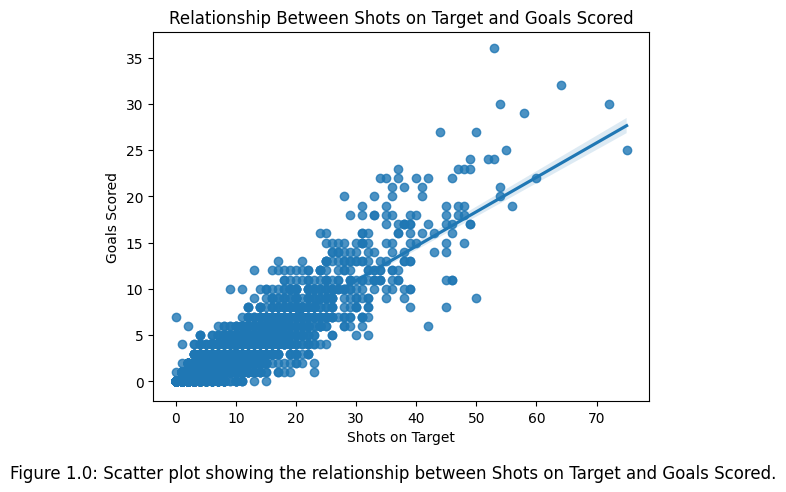

In [8]:
# Scatter plot
sns.regplot(x=data["SoT"], y=data["Gls"])
plt.xlabel("Shots on Target")
plt.ylabel("Goals Scored")
plt.title("Relationship Between Shots on Target and Goals Scored")
plt.figtext(0.5, -0.05, "Figure 1.0: Scatter plot showing the relationship between Shots on Target and Goals Scored.", ha="center", fontsize=12)
plt.savefig("../../plots/scatterplot_shots_on_target_goals_scored.png", dpi=300, bbox_inches="tight")
plt.show()

Is there a clear linear trend?

Yes, there is a clear linear trend in the scatter plot.

The points generally follow an upward trend: as Shots on Target increase, Goals Scored also tend to increase. Additionally, the fitted regression line in the plot closely follows the central tendency of the data, which supports the appropriateness of applying linear regression.

To confirm and quantify this linear relationship further, you should compute the correlation coefficient (e.g., Pearson’s r). A value close to +1 would confirm a strong positive linear relationship.



In [9]:
# Compute Pearson correlation coefficient
correlation = data["SoT"].corr(data["Gls"])
print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.92


A Pearson correlation coefficient of 0.92 indicates a very strong positive linear relationship between Shots on Target and Goals Scored. This confirms what the scatter plot visually suggests: as the number of shots on target increases, the number of goals scored tends to increase almost proportionally.

This strong correlation supports the use of linear regression to model this relationship effectively.

Building the Linear Regression Model
We use Scikit-learn to fit a simple linear regression model.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target variable (Y)
X = data[["SoT"]]  # Independent variable
Y = data["Gls"]       # Dependent variable

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predictions
Y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

MAE: 0.83, MSE: 1.88, R²: 0.82


Interpretation:

    MAE (Mean Absolute Error) = 0.83: On average, the model’s predictions are off by less than 1 goal, which is quite accurate for match-level statistics.

    MSE (Mean Squared Error) = 1.88: This is the average of squared differences, and while it's harder to interpret intuitively, it penalizes larger errors more strongly than MAE.

    R² (R-squared) = 0.82: About 82% of the variance in Goals Scored is explained by Shots on Target, indicating the model captures most of the pattern in the data.

Conclusion:

This is a strong, well-performing model. There may still be room for improvement (e.g., by adding other predictors like shot quality, location, or possession stats), but Shots on Target alone is already a powerful predictor of Goals Scored.

Predicting Goals scored using the model

In [12]:
# Predicting for a single value
shots = pd.DataFrame({"SoT": [25]})
predicted_goals = model.predict(shots)
print(f"Predicted Goals Scored for 25 shots on target: {predicted_goals[0]:.2f}")

Predicted Goals Scored for 25 shots on target: 9.05


In [13]:
# Filter rows with SoT around 25 (e.g., ±1)
subset = data[(data["SoT"] >= 24) & (data["SoT"] <= 26)]

# Average actual goals for those cases
actual_avg = subset["Gls"].mean()
print(f"Average actual goals for ~25 SoT: {actual_avg:.2f}")


Average actual goals for ~25 SoT: 9.21


The model predicted 9.05 goals for 25 shots on target, while the actual average from the data is 9.21 goals.
✅ What this tells us:

    The model's prediction is very close to the real-world average — just 0.16 goals off.

    That’s well within the model's MAE of 0.83, so it’s behaving exactly as expected.

    This confirms the regression model is making reliable, data-aligned predictions.

Predicting for multiple values:

In [14]:
new_shots = pd.DataFrame({"SoT": [10, 20, 30, 40]})
predicted_goals = model.predict(new_shots)
print(predicted_goals)

[ 3.44948196  7.18268155 10.91588114 14.64908073]


In [15]:
# Compare predictions with actual averages from the data
for sot, pred in zip(new_shots["SoT"], predicted_goals):
    # Filter rows in the dataset within ±1 of the current SoT
    nearby = data[(data["SoT"] >= sot - 1) & (data["SoT"] <= sot + 1)]
    actual_avg = nearby["Gls"].mean()
    print(f"SoT: {sot} | Predicted: {pred:.2f} | Actual Avg: {actual_avg:.2f} | Difference: {abs(pred - actual_avg):.2f}")


SoT: 10 | Predicted: 3.45 | Actual Avg: 2.86 | Difference: 0.59
SoT: 20 | Predicted: 7.18 | Actual Avg: 6.63 | Difference: 0.56
SoT: 30 | Predicted: 10.92 | Actual Avg: 11.16 | Difference: 0.24
SoT: 40 | Predicted: 14.65 | Actual Avg: 15.56 | Difference: 0.91
